<h1 style='font-size: 36px; font-weight: bold;'>Aplicação de Ferramentas de Data Science e Machine Learning na Previsão do Consumo Energético em um Ambiente Fabril</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import statistics

## O Dataset e o Projeto
<hr>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Data</b> - Data</li>
    <li><b>Dia_Semana</b> - Dia da Semana</li>
    <li><b>Consumo_MWh</b> - Consumo energético em MWh</li>
    <li><b>Tempo_Maq_h</b> - Tempo de máquina (h)</li>
    <li><b>TempMin</b> - Temperatura Mínima (°C)</li>
    <li><b>TempMed</b> - Temperatura Média (°C)</li>
    <li><b>TempMax</b> - Temperatura Máxima (°C)</li>
    <li><b>Horas_B</b> - Horas Trabalhadas (h)</li>
    <li><b>Horas_Terceiro</b> - Horas Trabalhadas - Func. Terceiro</li>
    <li><b>Horas_Total</b> - Horas Totais trabalhadas</li>
    <li><b>Sábado</b> - Sábado (1 = Sim; 0 = Não)</li>
    <li><b>Domingo</b> - Domingo (1 = Sim; 0 = Não)</li>
    <li><b>Feriado</b> - Feriado (1 = Sim; 0 = Não)</li>
    <li><b>Coletivas</b> - Férias Coletivas (1 = Sim; 0 = Não)</li>
</ul>

## Leitura dos dados

In [2]:
dados = pd.read_csv('../Final/Dados_Finais.csv', sep=';', encoding='latin-1')

## Visualizar os dados

In [3]:
dados.head()

,Data,Dia_Semana,Consumo_MWh,Tempo_Maq_h,TempMin,TempMed,TempMax,Horas_B,Horas_Terceiro,Horas_Total,Sabado,Domingo,Feriado,Coletivas
0,01/01/2017,Domingo,82.56,0.0,19.8,23.4,28.7,64.5,110.3,174.8,0,1,1,0
1,02/01/2017,Segunda,139.07,979.3,18.9,22.6,30.6,2140.0,1406.0,3546.0,0,0,0,0
2,03/01/2017,Terça,236.78,4430.4,19.2,22.0,29.3,13814.2,2347.6,16161.7,0,0,0,0
3,04/01/2017,Quarta,261.99,6332.3,18.8,22.9,30.8,14325.3,2264.6,16589.8,0,0,0,0
4,05/01/2017,Quinta,268.45,6357.4,18.7,22.3,28.9,14264.7,2267.6,16532.3,0,0,0,0


## Verificando o tamanho do dataset

In [4]:
dados.shape

(911, 14)

## Removendo linhas sem input de consumo e tempo de máquina

In [5]:
dados.dropna(subset=['Consumo_MWh'], inplace=True)
dados.shape

(660, 14)

In [6]:
dados.dropna(subset=['Tempo_Maq_h'], inplace=True)
dados.shape

(654, 14)

In [7]:
dados.index = range(len(dados))

In [8]:
dados.tail(5)

,Data,Dia_Semana,Consumo_MWh,Tempo_Maq_h,TempMin,TempMed,TempMax,Horas_B,Horas_Terceiro,Horas_Total,Sabado,Domingo,Feriado,Coletivas
649,26/06/2019,Quarta,275.77,8538.8,11.9,15.3,19.8,17008.6,3108.6,20117.2,0,0,0,0
650,27/06/2019,Quinta,272.94,8463.3,13.5,18.2,25.7,16857.0,3154.6,20011.6,0,0,0,0
651,28/06/2019,Sexta,272.01,8354.9,13.0,19.1,26.2,16621.4,2972.0,19593.4,0,0,0,0
652,29/06/2019,Sábado,195.68,4399.2,13.4,19.7,25.9,4579.0,656.5,5235.5,1,0,0,0
653,30/06/2019,Domingo,114.45,0.2,13.4,19.8,25.8,168.6,128.9,297.4,0,1,0,0


# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [9]:
dados.describe().round(2)

,Consumo_MWh,Tempo_Maq_h,TempMin,TempMed,TempMax,Horas_B,Horas_Terceiro,Horas_Total,Sabado,Domingo,Feriado,Coletivas
count,654.00,654.00,654.0,654.00,654.00,654.00,654.00,654.00,654.00,654.00,654.00,654.00
mean,226.62,6959.42,14.3,18.54,25.06,11594.27,2071.20,13665.46,0.14,0.14,0.03,0.02
std,61.21,4079.71,3.5,3.47,4.75,6794.05,1125.75,7875.14,0.35,0.35,0.17,0.13
min,76.24,0.00,-1.3,4.50,11.80,37.30,29.50,66.80,0.00,0.00,0.00,0.00
25%,197.56,3901.38,12.1,16.00,21.33,4604.82,892.82,5396.68,0.00,0.00,0.00,0.00
50%,255.82,8239.05,14.7,18.90,25.60,15221.85,2438.30,17651.70,0.00,0.00,0.00,0.00
75%,269.76,10141.47,17.0,21.20,28.90,16809.68,2945.38,19771.60,0.00,0.00,0.00,0.00
max,292.19,14646.90,21.5,26.50,35.90,18467.00,3948.00,22110.20,1.00,1.00,1.00,1.00


In [10]:
print(dados['Sabado'].value_counts()) # 93 sábados
print(dados['Domingo'].value_counts()) # 93 domingos
print(dados['Feriado'].value_counts()) # 19 feriados
print(dados['Coletivas'].value_counts()) # 12 coletivas

0    561
1     93
Name: Sabado, dtype: int64
0    561
1     93
Name: Domingo, dtype: int64
0    635
1     19
Name: Feriado, dtype: int64
0    642
1     12
Name: Coletivas, dtype: int64


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)

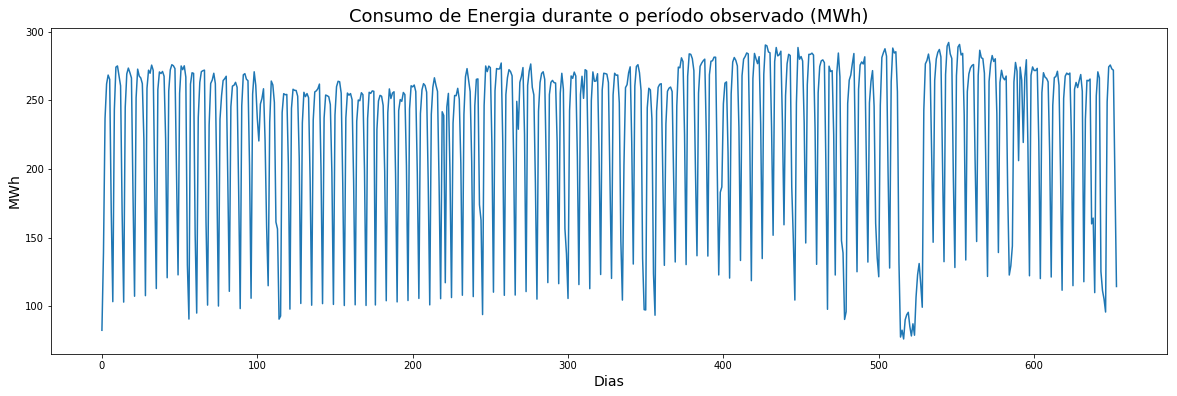

In [11]:
fig, var = plt.subplots(figsize=(20, 6))
var.set_title('Consumo de Energia durante o período observado (MWh)', fontsize=18)
var.set_xlabel('Dias', fontsize=14)
var.set_ylabel('MWh', fontsize=14)
var = dados['Consumo_MWh'].plot()

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

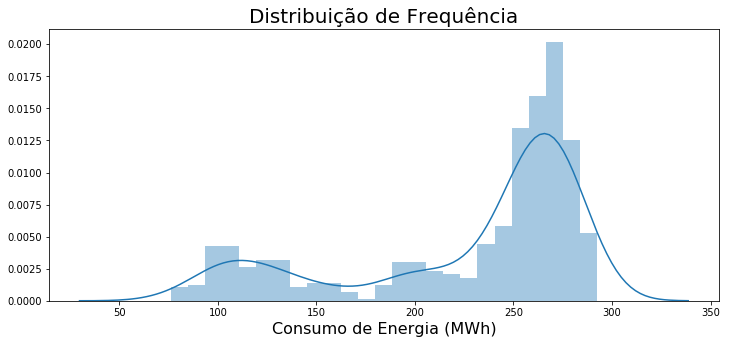

In [12]:
dist = sns.distplot(dados['Consumo_MWh'], bins=25)
dist.figure.set_size_inches(12, 5)
dist.set_title('Distribuição de Frequência', fontsize=20)
dist.set_xlabel('Consumo de Energia (MWh)', fontsize=16)
plt.show()

# <font color='red' style='font-size: 30px;'>Boxplot e Violinplot do consumo</font>
<hr style='border: 2px solid red;'>

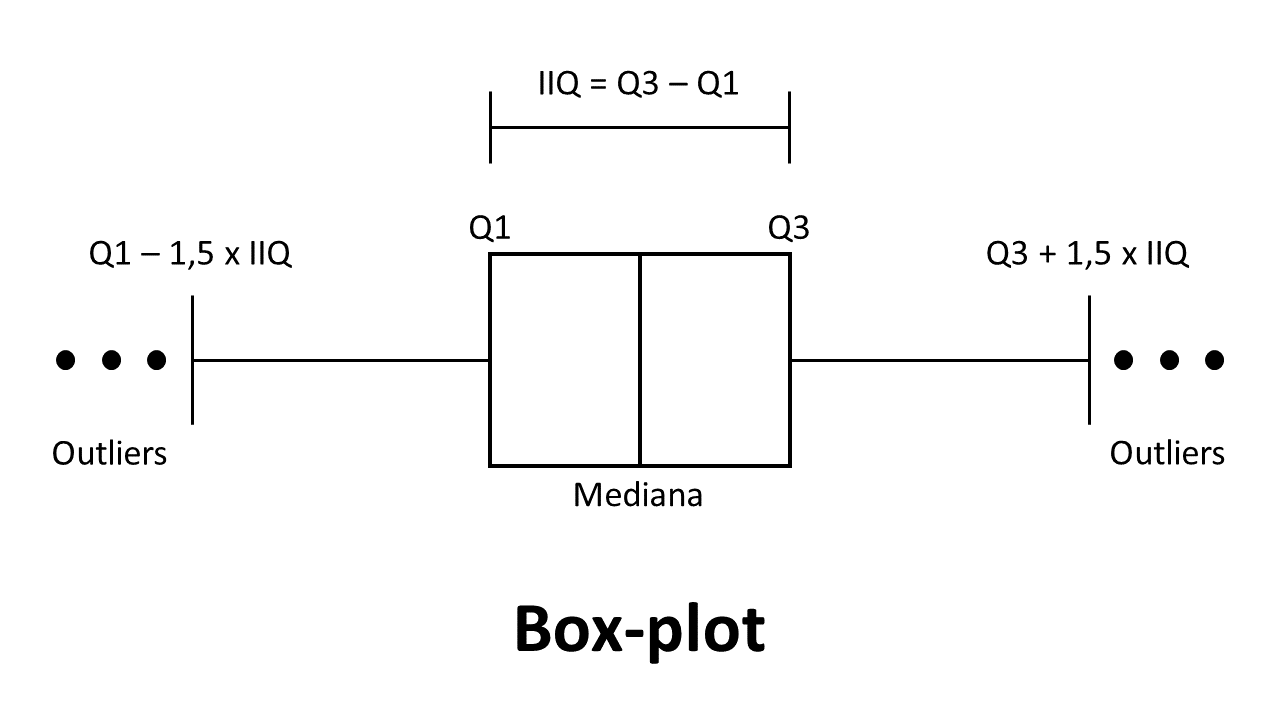

Text(0.5,1,'Consumo de Energia')

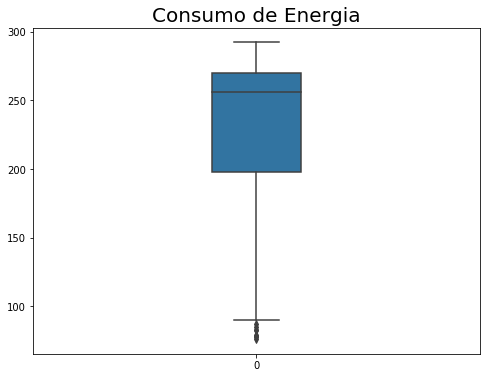

In [13]:
bp = sns.boxplot(data=dados['Consumo_MWh'], orient='v', width=0.2)
bp.figure.set_size_inches(8, 6)
bp.set_title('Consumo de Energia', fontsize=20)

Text(0,0.5,'MWh')

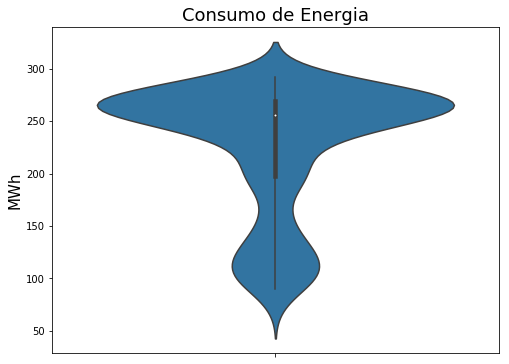

In [14]:
vp = sns.violinplot(data=dados, y='Consumo_MWh')
vp.figure.set_size_inches(8, 6)
vp.set_title('Consumo de Energia', fontsize=18)
vp.set_ylabel('MWh', fontsize=15)

# <font color='red' style='font-size: 30px;'>Violinplot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

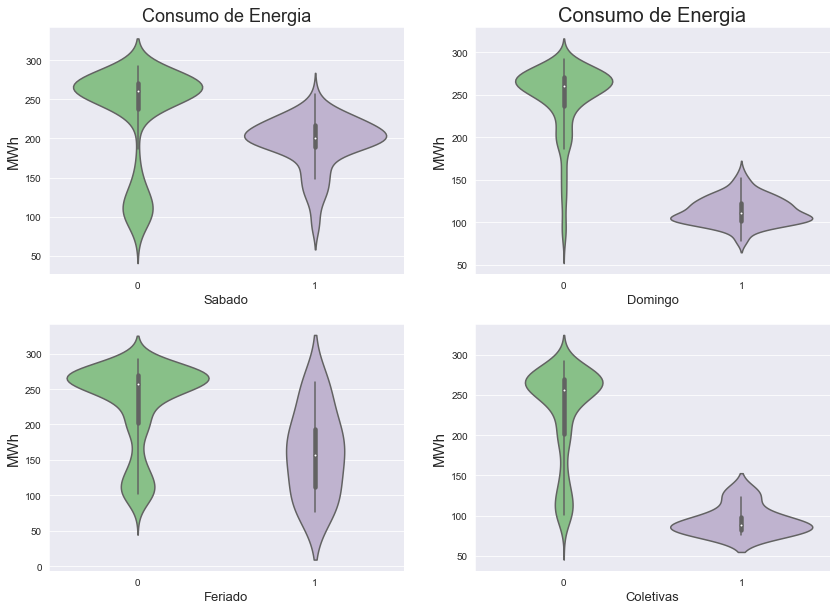

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(14,10))
vp_sab = sns.violinplot(data=dados, x='Sabado', y='Consumo_MWh', ax=axes[0,0])
vp_sab.set_title('Consumo de Energia', fontsize=18)
vp_sab.set_ylabel('MWh', fontsize=15)
vp_sab.set_xlabel('Sabado', fontsize=13)

vp_dom = sns.violinplot(data=dados, x='Domingo', y='Consumo_MWh', ax=axes[0,1])
vp_dom.set_title('Consumo de Energia', fontsize=20)
vp_dom.set_ylabel('MWh', fontsize=15)
vp_dom.set_xlabel('Domingo', fontsize=13)

vp_fer = sns.violinplot(data=dados, x='Feriado', y='Consumo_MWh', ax=axes[1,0])
vp_fer.set_ylabel('MWh', fontsize=15)
vp_fer.set_xlabel('Feriado', fontsize=13)

vp_col = sns.violinplot(data=dados, x='Coletivas', y='Consumo_MWh', ax=axes[1,1])
vp_col.set_ylabel('MWh', fontsize=15)
vp_col.set_xlabel('Coletivas', fontsize=13)
plt.show()

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [16]:
dados.corr().round(3)

,Consumo_MWh,Tempo_Maq_h,TempMin,TempMed,TempMax,Horas_B,Horas_Terceiro,Horas_Total,Sabado,Domingo,Feriado,Coletivas
Consumo_MWh,1.000,0.897,0.034,0.039,0.027,0.555,0.480,0.548,-0.219,-0.752,-0.187,-0.296
Tempo_Maq_h,0.897,1.000,-0.122,-0.116,-0.095,0.512,0.432,0.503,-0.312,-0.680,-0.168,-0.232
TempMin,0.034,-0.122,1.000,0.870,0.643,-0.011,0.011,-0.008,0.012,0.029,-0.004,0.136
TempMed,0.039,-0.116,0.870,1.000,0.909,-0.064,-0.031,-0.059,0.003,0.031,0.020,0.146
TempMax,0.027,-0.095,0.643,0.909,1.000,-0.104,-0.071,-0.100,0.008,0.032,0.029,0.125
Horas_B,0.555,0.512,-0.011,-0.064,-0.104,1.000,0.954,0.999,-0.270,-0.342,-0.202,-0.203
Horas_Terceiro,0.480,0.432,0.011,-0.031,-0.071,0.954,1.000,0.966,-0.282,-0.313,-0.173,-0.096
Horas_Total,0.548,0.503,-0.008,-0.059,-0.100,0.999,0.966,1.000,-0.273,-0.340,-0.199,-0.189
Sabado,-0.219,-0.312,0.012,0.003,0.008,-0.270,-0.282,-0.273,1.000,-0.166,-0.044,-0.023
Domingo,-0.752,-0.680,0.029,0.031,0.032,-0.342,-0.313,-0.340,-0.166,1.000,-0.044,-0.023


In [17]:
dados = dados.drop(['TempMin', 'TempMax', 'Horas_B', 'Horas_Terceiro'], axis=1)

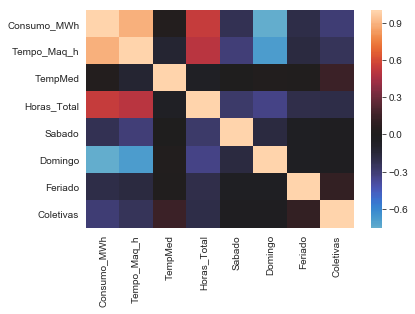

In [18]:
sns.heatmap(dados.corr(), center=0)

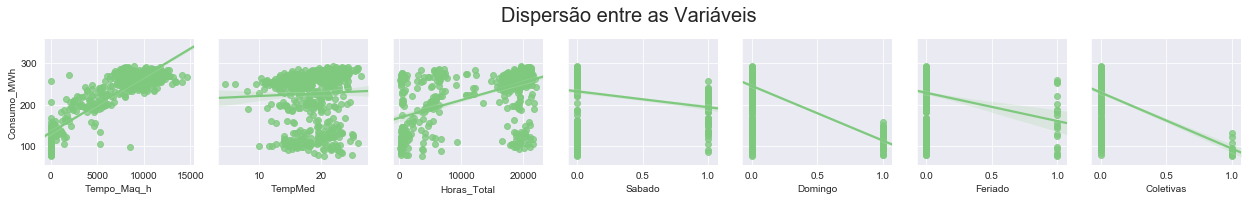

In [19]:
pair = sns.pairplot(dados, y_vars='Consumo_MWh', x_vars=['Tempo_Maq_h', 'TempMed', 'Horas_Total', 'Sabado', 'Domingo', 'Feriado', 'Coletivas'], kind='reg')
pair.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
plt.show()

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Estimando um Modelo de Regressão Linear para o Consumo
# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>

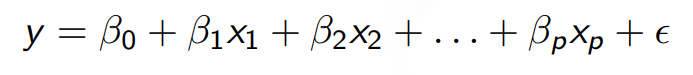

## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

In [20]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Energia (y)

In [21]:
y = dados['Consumo_MWh']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [22]:
X = dados[['Tempo_Maq_h', 'TempMed', 'Horas_Total', 'Sabado', 'Domingo', 'Feriado', 'Coletivas']]

## Criando os datasets de treino e de teste

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [24]:
X_train.shape

(457, 7)

In [25]:
X_test.shape

(197, 7)

In [26]:
X_train.shape[0] + X_test.shape[0]

654

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [28]:
modeloreg = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [29]:
modeloreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [30]:
print('R² = {}'.format(modeloreg.score(X_train, y_train).round(2)))

R² = 0.92


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [31]:
y_previsto = modeloreg.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [32]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.88


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [33]:
entrada = X_test[0:1]
saida = y_test[0:1]
print(entrada)
print(saida)

     Tempo_Maq_h  TempMed  Horas_Total  Sabado  Domingo  Feriado  Coletivas
333      10748.2     21.3      18059.8       0        0        0          0
333    248.18
Name: Consumo_MWh, dtype: float64


## Gerando previsão pontual

In [34]:
modeloreg.predict(entrada)[0]

280.8317101422125

## Criando um simulador para o consumo de energia

In [35]:
Tempo_Maq_h = 10000
TempMed = 23
Horas_Total = 16000
Sabado = 0
Domingo = 0
Feriado = 0
Coletivas = 0
entrada = [[Tempo_Maq_h, TempMed, Horas_Total, Sabado, Domingo, Feriado, Coletivas]]

print('O Consumo previsto para este dia será de {0:.2f} MWh'.format(modeloreg.predict(entrada)[0]))

O Consumo previsto para este dia será de 278.56 MWh


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Energia) tendo todas as variáveis explicativas excluídas do modelo.</p>

In [36]:
modeloreg.intercept_
#consumo médio de energia sem considerar as outras variáveis

135.75485504952246

## Obtendo os coeficientes de regressão

In [37]:
modeloreg.coef_

array([ 7.21232664e-03,  2.62164732e+00,  6.48746827e-04, -2.06742888e+01,
       -7.46891272e+01, -3.51633116e+01, -8.79251899e+01])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [38]:
X.columns

Index(['Tempo_Maq_h', 'TempMed', 'Horas_Total', 'Sabado', 'Domingo', 'Feriado',
       'Coletivas'],
      dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [39]:
index = ['Parâmetros']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [40]:
pd.DataFrame(data=[np.append(modeloreg.intercept_, modeloreg.coef_)], index=index, columns=['Intercepto', 'Tempo_Maq_h', 'TempMed', 'Horas_Total', 'Sabado', 'Domingo', 'Feriado', 'Coletivas'])

,Intercepto,Tempo_Maq_h,TempMed,Horas_Total,Sabado,Domingo,Feriado,Coletivas
Parâmetros,135.754855,0.007212,2.621647,0.000649,-20.674289,-74.689127,-35.163312,-87.92519


# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [41]:
y_previsto_train = modeloreg.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

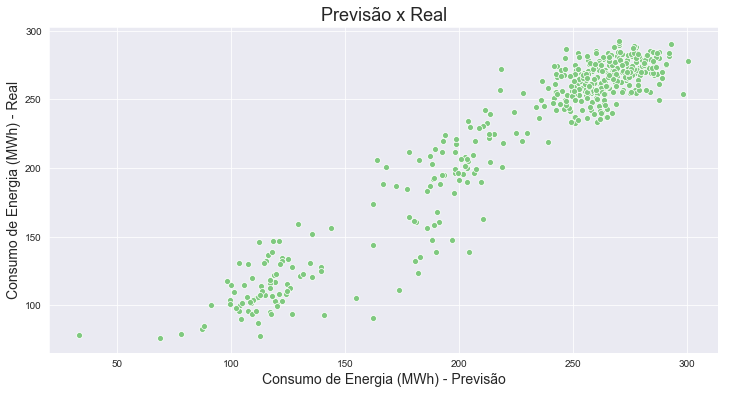

In [42]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Consumo de Energia (MWh) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Energia (MWh) - Real', fontsize=14)
plt.show()

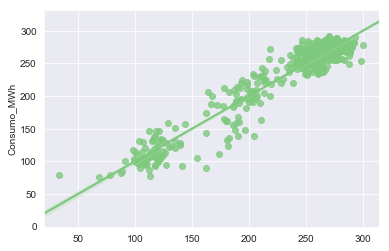

In [43]:
prev = pd.DataFrame({'x':y_previsto_train, 'y':y_train})
sns.regplot(x=y_previsto_train, y=y_train, data=prev)

## Obtendo os resíduos

In [44]:
residuo = y_train - y_previsto_train
residuo.describe().round(2)

count    457.00
mean      -0.00
std       17.26
min      -71.62
25%       -8.68
50%       -0.25
75%       11.64
max       53.68
Name: Consumo_MWh, dtype: float64

In [45]:
porc_residuo = abs(residuo) / y_train
porc_residuo.describe().round(2)

count    457.00
mean       0.07
std        0.09
min        0.00
25%        0.02
50%        0.05
75%        0.09
max        0.79
Name: Consumo_MWh, dtype: float64

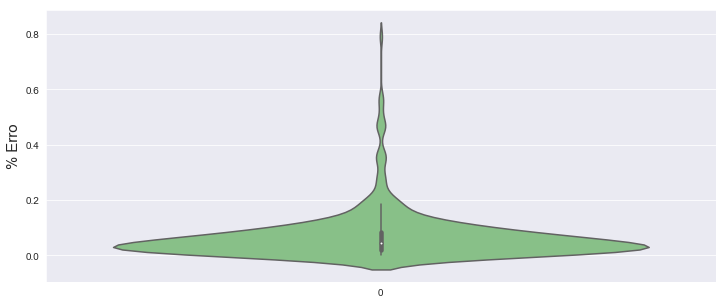

In [46]:
vp = sns.violinplot(data=porc_residuo)
vp.figure.set_size_inches(12, 5)
vp.set_ylabel('% Erro', fontsize=15)
plt.show()

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

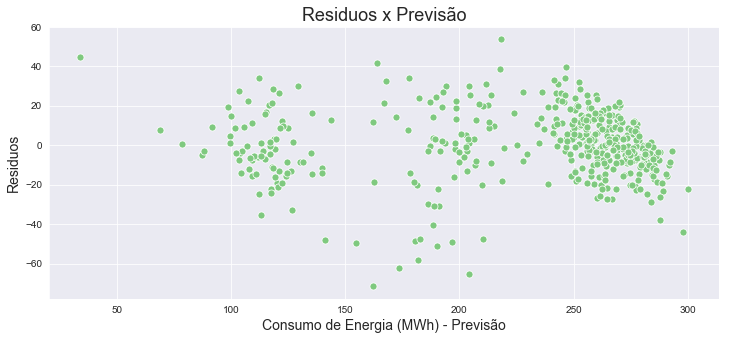

In [47]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=50)
ax.figure.set_size_inches(12, 5)
ax.set_title('Residuos x Previsão', fontsize=18)
ax.set_xlabel('Consumo de Energia (MWh) - Previsão', fontsize=14)
ax.set_ylabel('Residuos', fontsize=14)
plt.show()

## Utilizando os resíduos ao quadrado

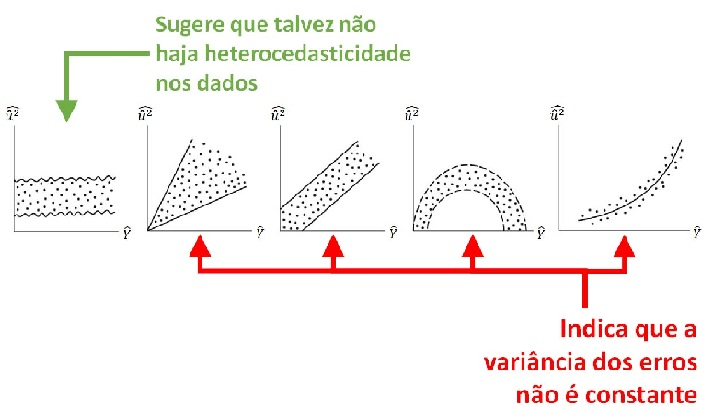

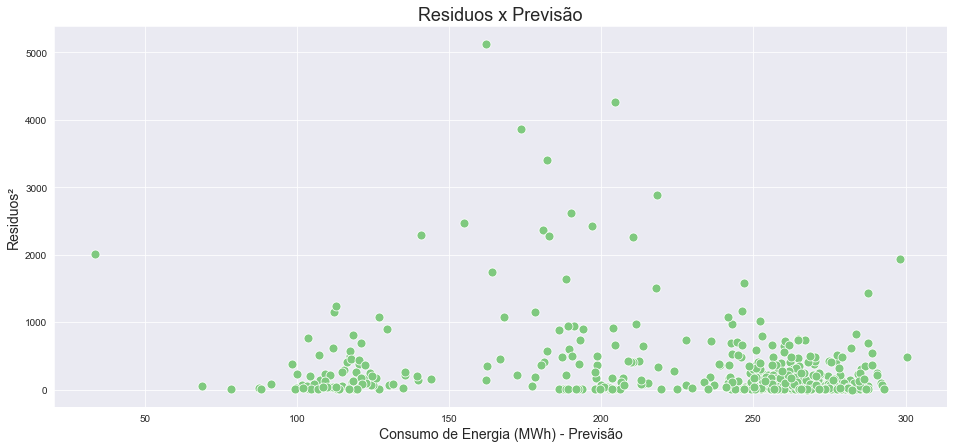

In [48]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=80)
ax.figure.set_size_inches(16, 7)
ax.set_title('Residuos x Previsão', fontsize=18)
ax.set_xlabel('Consumo de Energia (MWh) - Previsão', fontsize=14)
ax.set_ylabel('Residuos²', fontsize=14)
plt.show()

## Plotando a distribuição de frequências dos resíduos

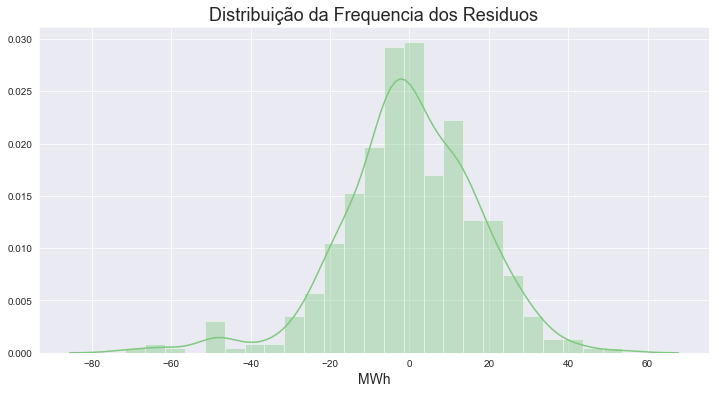

In [49]:
ax = sns.distplot(residuo, bins=25)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da Frequencia dos Residuos', fontsize=18)
ax.set_xlabel('MWh', fontsize=14)
plt.show()

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Validação Cruzada

Método que varia o conjunto de teste e treino para obter diferentes scores.
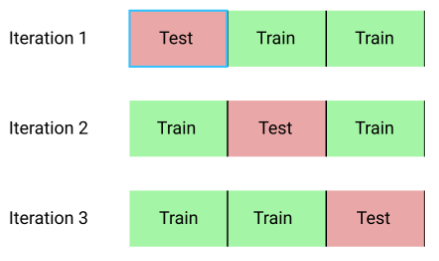

## Obtendo métricas para o modelo

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
DP = statistics.stdev(residuo)
R2 = metrics.r2_score(y_test, y_previsto).round(2)
CV = cross_val_score(modeloreg, X_test, y_test).mean().round(2)

pd.DataFrame([EQM, REQM, DP, R2, CV], ['EQM', 'REQM', 'Desvio Padrão', 'R²', 'Valid. Cruzada'], columns=['Métricas'])

,Métricas
EQM,467.170000
REQM,21.610000
Desvio Padrão,17.256633
R²,0.880000
Valid. Cruzada,0.840000


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

# Salvando o modelo estimado

### pickle (https://docs.python.org/3/library/pickle.html)
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [52]:
import pickle

In [53]:
output = open('modelo_consumo_energia', 'wb')  # wb = write binary
pickle.dump(modeloreg, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_energia','rb')
lm_new = pickle.load(modelo)
modeloreg.close()

Tempo_Maq_h = 10000
TempMed = 23
Horas_Total = 16000
Sabado = 0
Domingo = 0
Feriado = 0
Coletivas = 0
entrada = [[Tempo_Maq_h, TempMed, Horas_Total, Sabado, Domingo, Feriado, Coletivas]]

print('O Consumo previsto para este dia será de {0:.2f} MWh'.format(lm_new.predict(entrada)[0]))
```